In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tensorflow as tf

In [ ]:
# loading data from the cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
# checking the data shape for all classes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [ ]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# creating data for three selected classes, i.e. class 0 - airplane, class 3 - cat, class 9 - truck
x_train = x_train[np.isin(y_train, [0,3,9]).flatten()]  # 0 airplane, 3 cat, 9 truck 
y_train = y_train[np.isin(y_train, [0,3,9]).flatten()]
x_test = x_test[np.isin(y_test, [0,3,9]).flatten()] # 0 airplane, 3 cat, 9 truck 
y_test = y_test[np.isin(y_test, [0,3,9]).flatten()]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(15000, 32, 32, 3) (3000, 32, 32, 3) (15000, 1) (3000, 1)


True orginal label : [9]


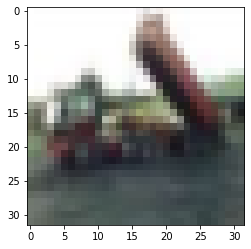

True orginal label : [3]


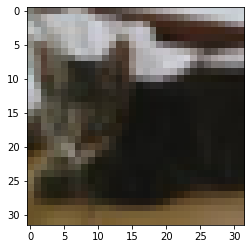

True orginal label : [9]


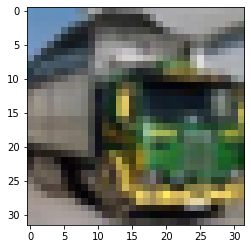

True orginal label : [9]


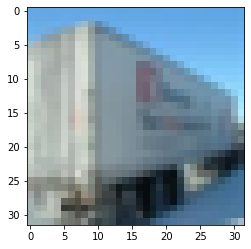

True orginal label : [9]


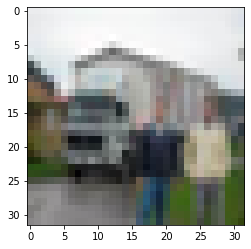

True orginal label : [3]


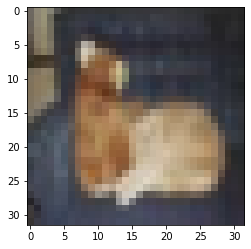

True orginal label : [3]


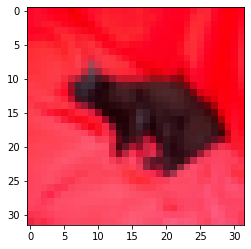

True orginal label : [3]


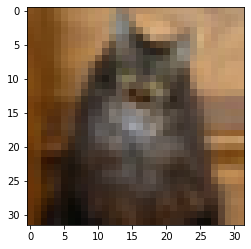

True orginal label : [0]


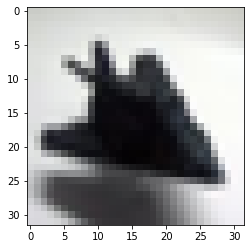

True orginal label : [0]


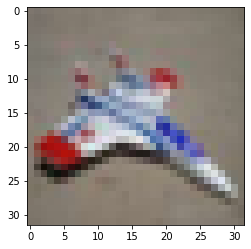

In [ ]:
# presenting a few examples from the training set
example = 0
for i in range(10):
  example +=1
  plt.imshow(x_train[example])
  print("True orginal label :", y_train[example])
  plt.show(block=True)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [ ]:
print(x_train.shape, x_test.shape)

(15000, 3072) (3000, 3072)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer, MinMaxScaler, StandardScaler
# scaler = Normalizer()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# scaler = MaxAbsScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# x_train = x_train.astype('float32')/255.0
# x_test = x_test.astype('float32')/255.0

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report
clf  = svm.SVC(C=2.4)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.835


In [ ]:
f1_score(y_test, y_pred, average='weighted') 

0.8348993841383716

In [ ]:
recall_score(y_test, y_pred, average="weighted")

0.835

In [ ]:
confusion_matrix(y_test, y_pred)

array([[835,  86,  79],
       [ 73, 860,  67],
       [ 94,  96, 810]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           3       0.83      0.86      0.84      1000
           9       0.85      0.81      0.83      1000

    accuracy                           0.83      3000
   macro avg       0.84      0.83      0.83      3000
weighted avg       0.84      0.83      0.83      3000



In [ ]:
print(f1_score(Y_test, Y_pred, average='weighted'))

0.9665831244778613
